# DATA CLEANING

# I. Imports, modules, configurations

## I.1 Configs

In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys


sys.path.insert(0, "/home/apprenant/Documents/simplon_dev/pyhon_sql/Foodflix3")

#We can now use this folder and import our modules
from src.utils.functions import msv1


# Pandas configurations 
sns.set()
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## I.2 Dataset import

In [517]:
# Reading the tsv files, printing the shape to see its dimensions and display the first five rows
"""
    The original dataset contains more than 360k rows.
    The source dataset : https://www.kaggle.com/openfoodfacts/world-food-facts
    For this analysis, I created a dataset sample from the original tsv file. Sample of 10k rows
    Code:
    df = pd.read_csv('foodflix_data.tsv', sep='\t') # This is the original dataset
    # The sample method randomly choose rows from a dataframe.  
    df = df.sample(10000)
    df.to_csv('foodflix_10000.tsv', sep='\t')
"""


df = pd.read_csv('../Data/raw_data/foodflix.tsv', sep='\t', low_memory=False)

# II. Columns selection

## II.1 Drop columns with more than 90% missing values

In [518]:
# Print all columns that have 100% values missing and all colonms that have english related meaning
cols_to_drop = []
for col in df.columns:
    if (df[col].isnull().sum() == df.shape[0]) or ("_uk" in df[col].name or '-uk' in df[col].name):
        cols_to_drop.append(df[col].name)

print(cols_to_drop)

['no_nutriments', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', '-butyric-acid_100g', '-caproic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-melissic-acid_100g', '-elaidic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'chlorophyl_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g']


In [519]:
# We drop all columns that have no registered values
df = df.drop(cols_to_drop, axis=1)
print('There are {:,} rows and {} columns left in our dataset'.format(df.shape[0], df.shape[1]))

There are 356,027 rows and 146 columns left in our dataset


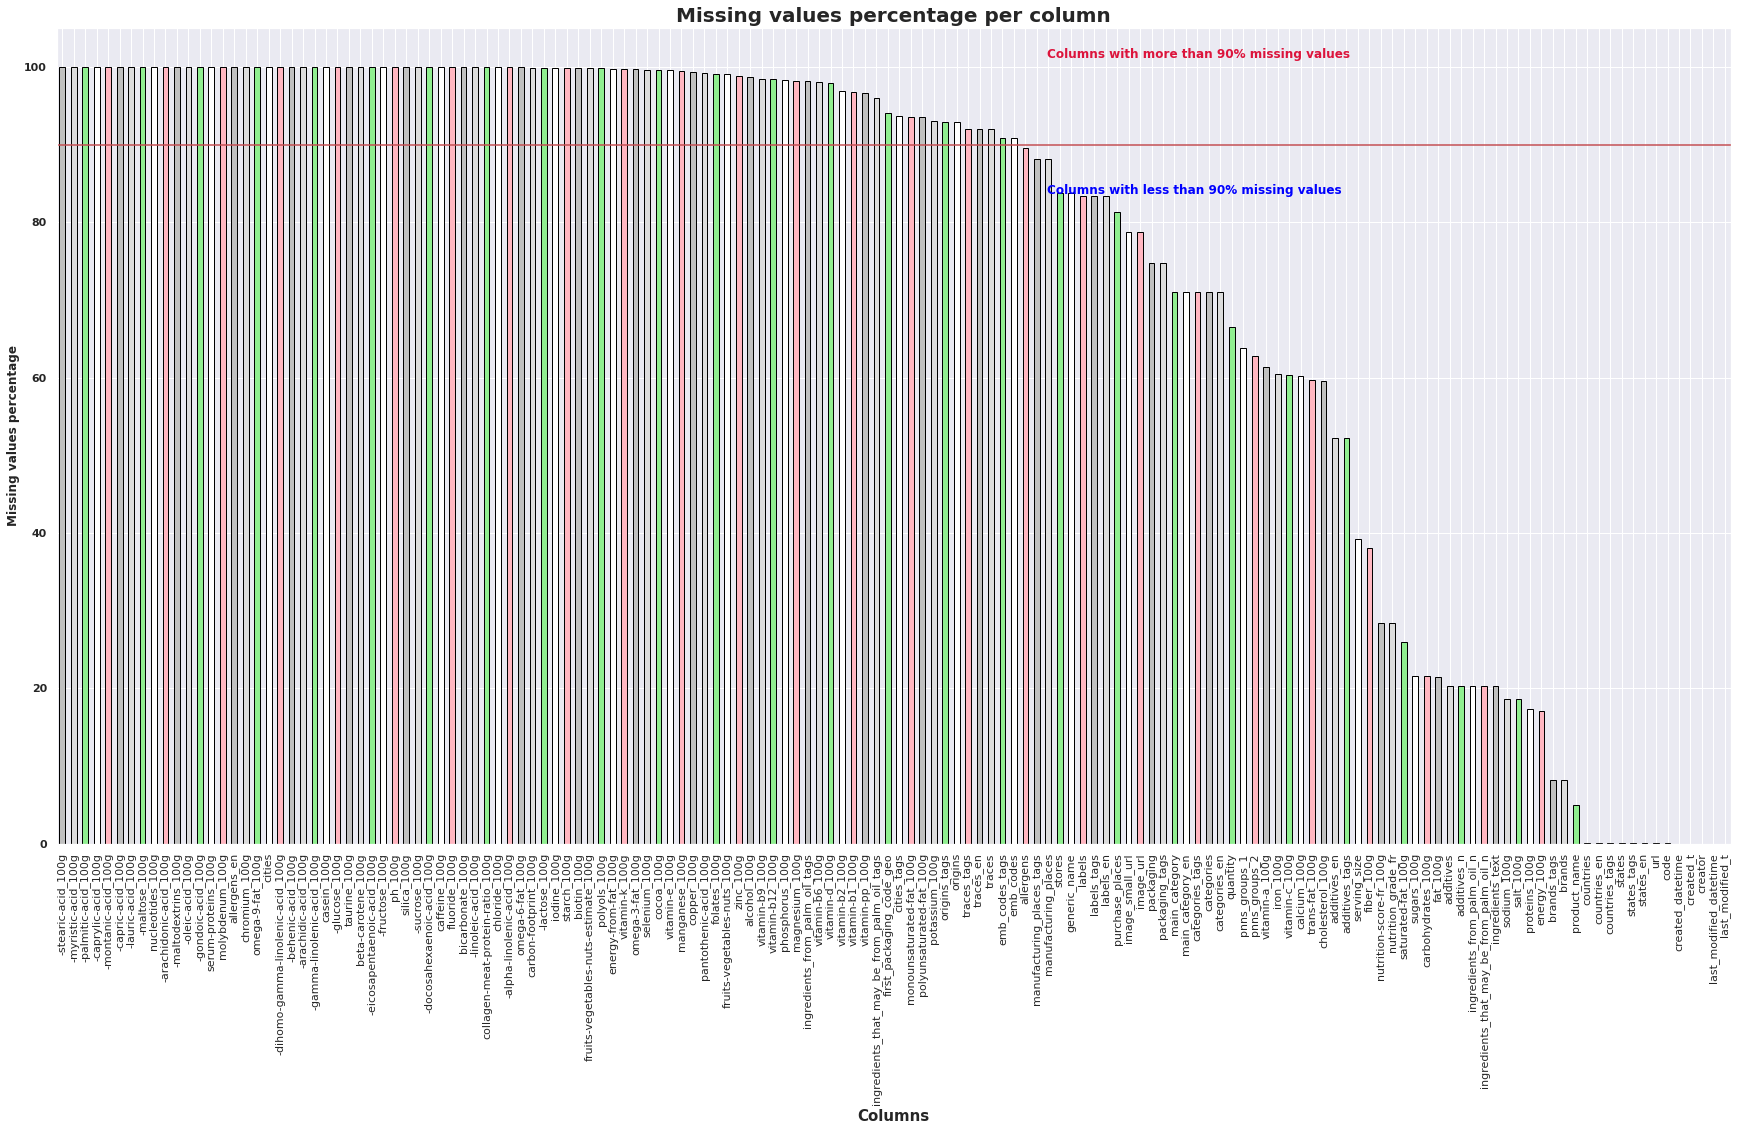

In [520]:
# Histogram of our remaining columns after dropping columns that have 100% missing values
msv1(df,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

We can see that we still have a lot of columns that have more than 90% values missing. Let's drop them there's really nothing we can do with that much missing values.

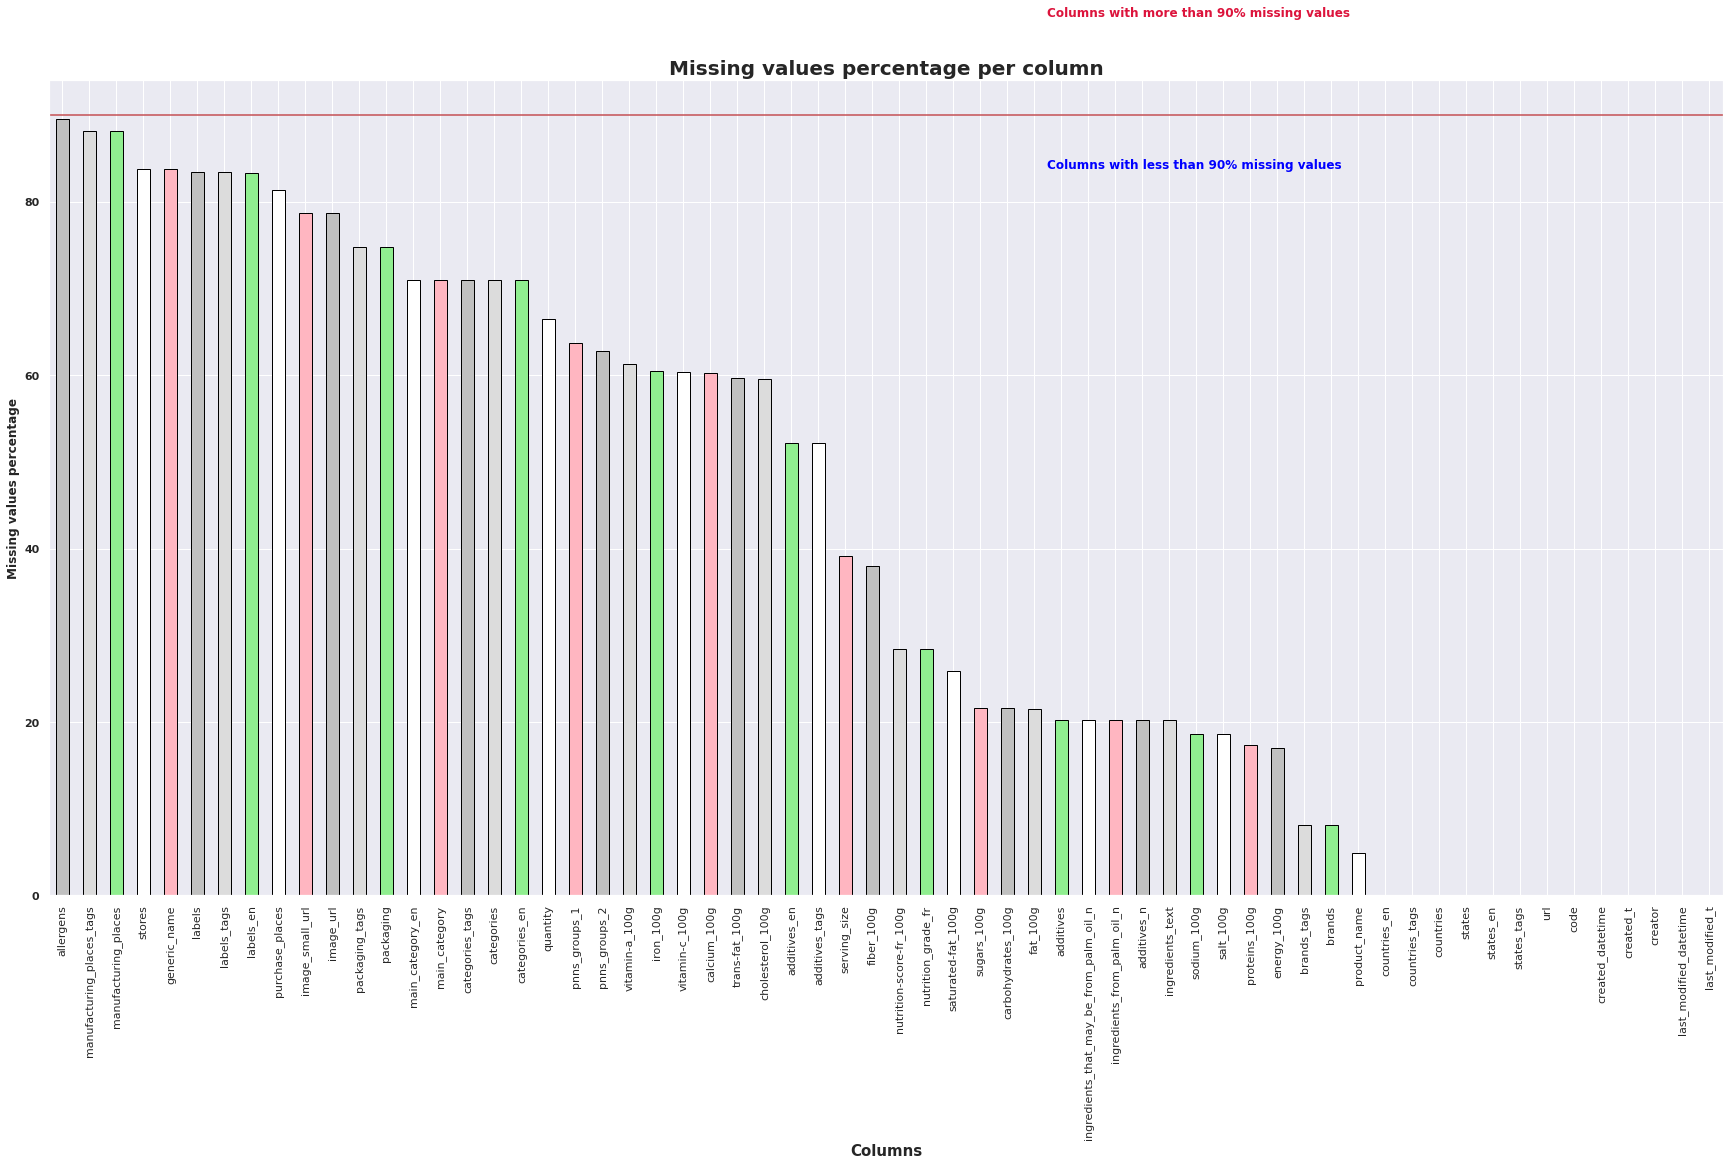

There are 356,027 rows and 62 columns in our dataset


In [521]:
# We drop all values that have less than 10% usable data 
df=df.dropna(thresh=(df.shape[0] * 10 / 100), axis=1)
msv1(df,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))
print('There are {:,} rows and {} columns in our dataset'.format(df.shape[0], df.shape[1]))

After dropping all those columns, there are still some variables that we can drop as they won't be usefull for our analysis such as url or created_t.

## II.2 Drop columns that won't be usefull for our analysis  

There are 356,027 rows and 18 columns left in our dataset


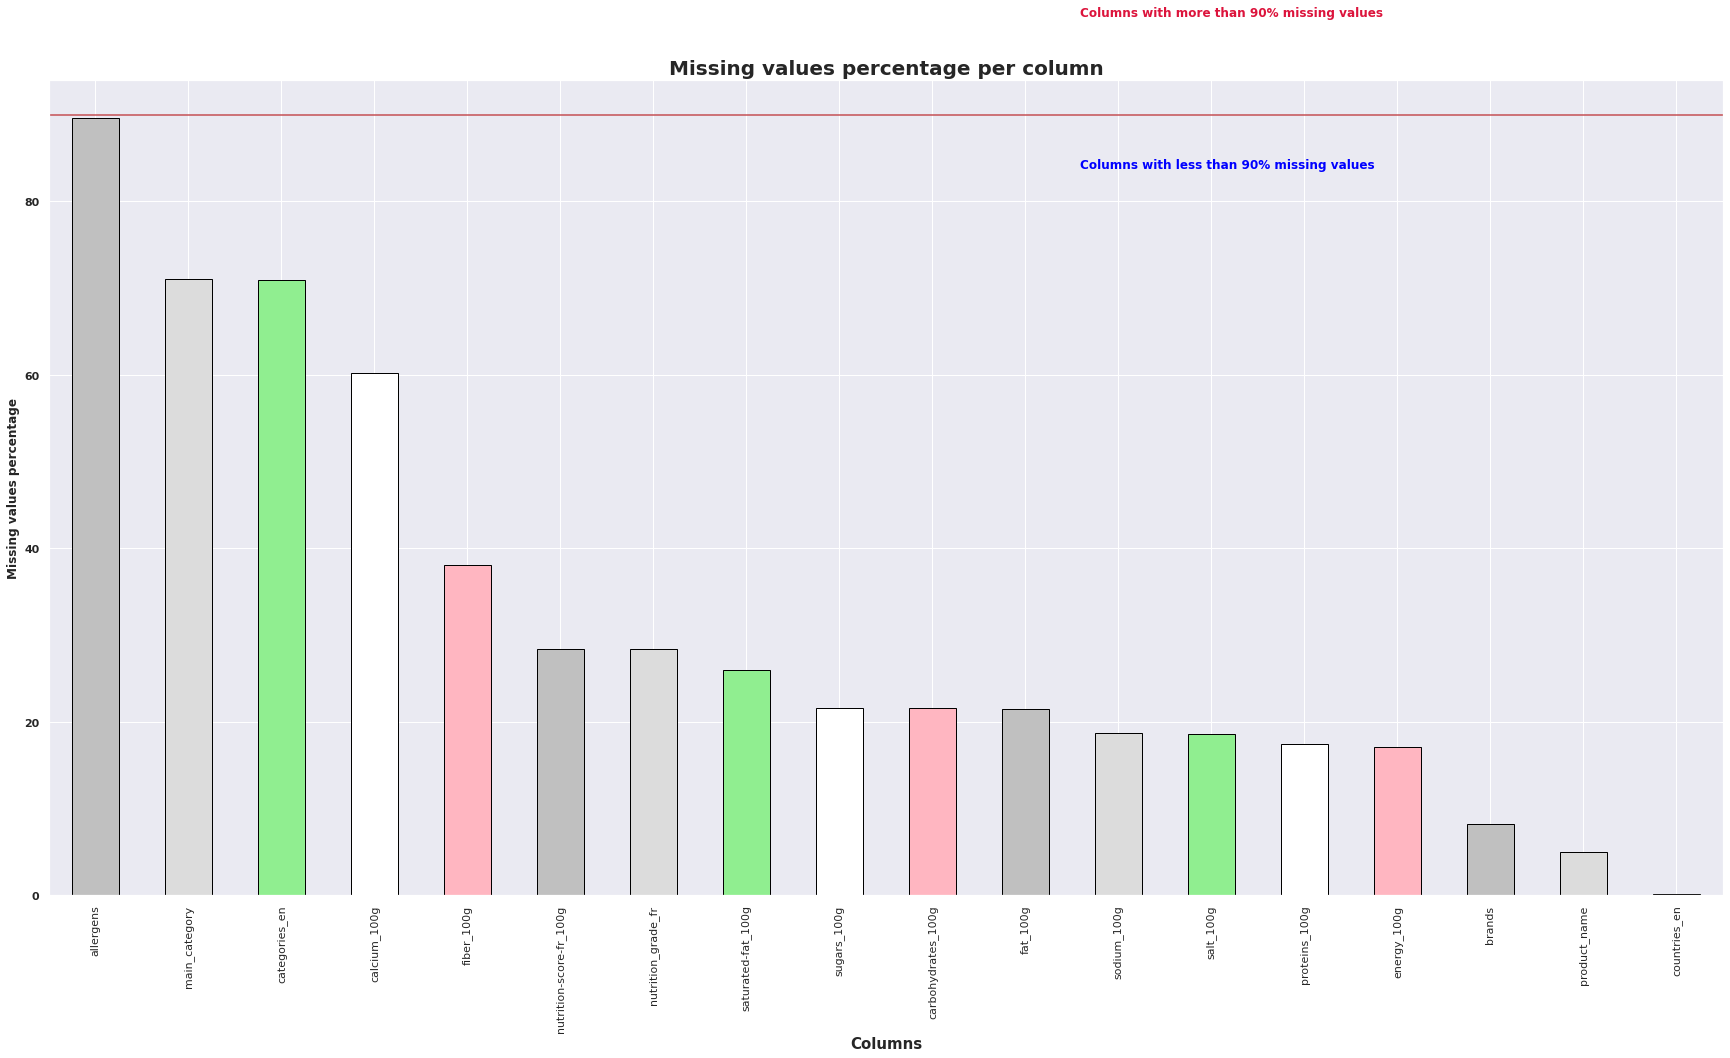

In [522]:
df = df.drop([
    'code', 
    'url',
    'additives_en',
    'labels_en',
    'states_en',
    'main_category_en',
    'creator', 
    'created_t', 
    'created_datetime', 
    'last_modified_t',  
    'last_modified_datetime', 
    'states', 
    'states_tags', 
    #'brands', 
    'brands_tags',
    'ingredients_text',
    'additives',
    'serving_size',
    'additives_tags',
    'additives_n',
    'pnns_groups_2',
    'pnns_groups_1',
    'packaging_tags',
    'packaging',
    'image_url',
    'image_small_url',
    'labels',
    'labels_tags',
    'stores',
    'quantity',
    'purchase_places',
    'manufacturing_places',
    'manufacturing_places_tags',
    'trans-fat_100g',
    'ingredients_that_may_be_from_palm_oil_n',
    'ingredients_from_palm_oil_n',
    'cholesterol_100g',
    'vitamin-c_100g',
    'vitamin-a_100g',
    'generic_name',
    'categories_tags',
    'countries',
    'countries_tags',
    'categories',
    'iron_100g'
    ], axis=1)

print('There are {:,} rows and {} columns left in our dataset'.format(df.shape[0], df.shape[1]))
msv1(df,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'))

We wanna keep the allergens columns since a really usefull data even though there are a lot of missing values in it.
We should look at the correlations between columns to see if we can clear up a bit more our columns since there can be some redondant data.

## II.3 Drop columns based on data correlation

In [523]:
# Display the correlation ratio between variables(range between 1 and -1)
df.corr(method = "pearson")

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,nutrition-score-fr_100g
energy_100g,1.00,0.74,0.54,0.47,0.40,-0.00,0.27,-0.00,-0.00,0.01,0.53
fat_100g,0.74,1.00,0.69,1.00,-0.05,-0.00,1.00,-0.00,-0.00,0.01,0.56
saturated-fat_100g,0.54,0.69,1.00,-0.05,0.14,-0.00,0.16,-0.00,-0.00,0.02,0.62
carbohydrates_100g,0.47,1.00,-0.05,1.00,0.66,-0.00,1.00,-0.00,-0.00,-0.01,0.25
sugars_100g,0.40,-0.05,0.14,0.66,1.00,-0.00,-0.21,0.00,0.00,-0.00,0.44
fiber_100g,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,0.00,-0.00
proteins_100g,0.27,1.00,0.16,1.00,-0.21,-0.00,1.00,-0.00,-0.00,0.04,0.10
salt_100g,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,1.00,1.00,0.00,0.01
sodium_100g,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,1.00,1.00,0.00,0.01
calcium_100g,0.01,0.01,0.02,-0.01,-0.00,0.00,0.04,0.00,0.00,1.00,0.02


Let's plot the result for better understanding the relations

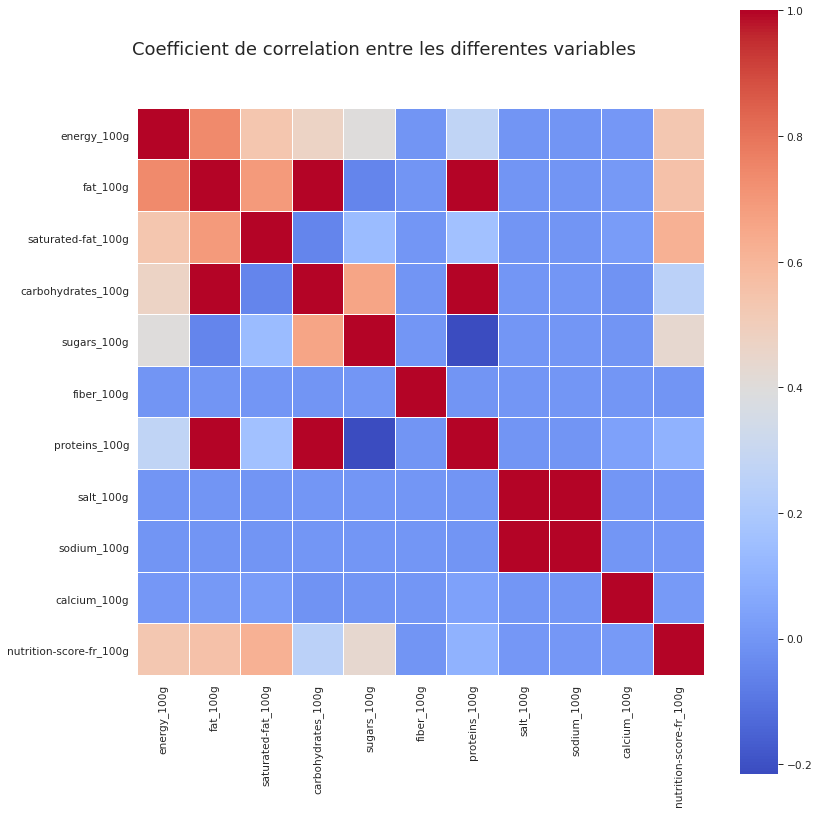

In [524]:
sns.set(context="paper", font_scale = 1.2)
# compute the correlation matrix for all the numeric columns
corrmat = df.corr()
# size of the plot
f, ax = plt.subplots(figsize=(12, 12))
# set the plot heading
f.text(0.45, 0.93, "Coefficient de correlation entre les differentes variables", ha='center', fontsize = 18)
# plot matrix as a heatmap
sns.heatmap(corrmat, square=True, linewidths=0.01, cmap="coolwarm")
plt.tight_layout()

In [525]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [526]:
print('The top 5 Correlations between variables are: \n{}'.format(get_top_abs_correlations(df.select_dtypes(include=float), n=5)))

The top 5 Correlations between variables are: 
fat_100g            proteins_100g        1.00
carbohydrates_100g  proteins_100g        1.00
fat_100g            carbohydrates_100g   1.00
salt_100g           sodium_100g          1.00
energy_100g         fat_100g             0.74
dtype: float64


We exclude the variable 'sodium_100g' since it is so highly correlated with 'salt_100g'

In [527]:
df = df.drop([
    'sodium_100g'
],axis=1)

#### Conclusion

* Nutrition scores are more positively related to saturated fats than proteins and fats.
* Nutrition scores are inversely proportional to salt, sodium and proteins.
* Sugars and proteins are inversely related.
* Salt and sodium are very strongly positively related.


## II.4 Renaming some columns

In [528]:
# We rename all columns that contain a "-" since it can cause problems with python 3
df = df.rename(columns={
    'nutrition-score-fr_100g': 'nutrition_score_fr_100g',
    'saturated-fat_100g': 'saturated_fat_100g'
})

# III. Rows selection

## III.1 Drop Rows that contains only NaNs

In [529]:
# We first drop all rows that (after dropping some columns) only contain NaNs
df = df.dropna(axis=0, how='all')
print('There are {:,} rows and {} columns left in our dataset'.format(df.shape[0], df.shape[1]))

There are 355,984 rows and 17 columns left in our dataset


## III.2 Drop duplicates values

In [530]:
print('We have {} duplicates in our dataset'.format(df.duplicated().sum()))


We have 20876 duplicates in our dataset


Before droping them let's have a closer look at those duplicates

In [531]:
# Let's visualize our duplicated values and analyse them
df[df.duplicated(keep=False)]

,product_name,brands,categories_en,countries_en,allergens,nutrition_grade_fr,main_category,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,calcium_100g,nutrition_score_fr_100g
49,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Fresh Organic Carrots,Bunny-Luv,NaN,United States,NaN,a,NaN,159.00,0.00,0.00,8.97,6.41,2.60,1.28,0.20,0.03,-2.00
241,NaN,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356001,NaN,NaN,"Spreads,Breakfasts,Sweet spreads,fr:Pâtes à ta...",France,NaN,NaN,en:spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356002,NaN,NaN,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356008,nf test,NaN,NaN,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356009,NaN,NaN,"Spreads,Breakfasts,Sweet spreads,fr:Pâtes à ta...",France,NaN,NaN,en:spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [532]:
df.drop_duplicates(inplace=True)
print('There are {:,} rows left in our dataset'.format(df.shape[0], df.shape[1]))

There are 335,108 rows left in our dataset


## III.3 Drop rows that aren't related to a french product (we base our study on french products only at the moment)

Let's analyse the country_en column first

In [533]:
# Most common countries represented in the dataset
print('These are the 10 most common countries represented in this dataset:\n{}'.format(df['countries_en'].value_counts().head(10)))

These are the 10 most common countries represented in this dataset:
United States         166111
France                117564
Switzerland            13487
Germany                 7798
Spain                   4954
United Kingdom          3914
Belgium                 2262
Australia               1708
Russia                  1529
France,Switzerland      1491
Name: countries_en, dtype: int64


Text(0.5, 1.0, 'The 10 most represented countries')

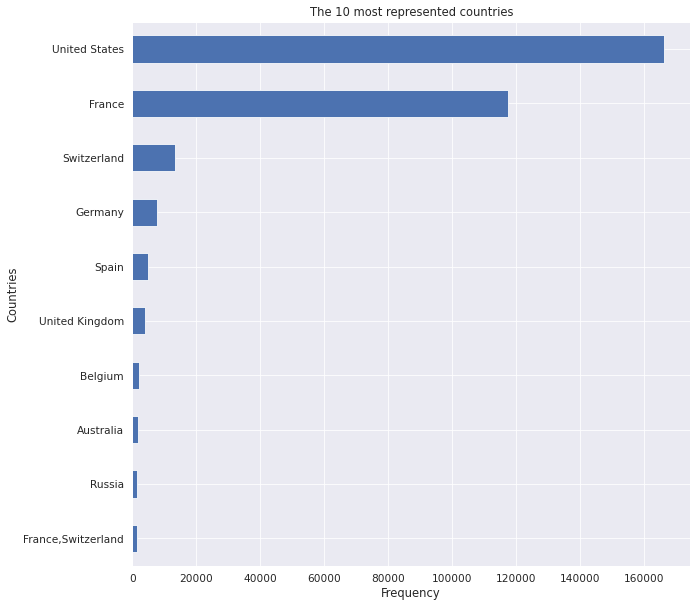

In [534]:
df['countries_en'].value_counts().head(10).sort_values().plot(kind="barh", figsize=(10,10))
plt.xlabel('Frequency')
plt.ylabel('Countries')
plt.title('The 10 most represented countries')

In [535]:
# We base our study on only french product (filter on countries_en column to keep only France value)
df["countries_en"] = df["countries_en"].apply(
    lambda x: "France" if re.match(r".*(fr).*", str(x), re.IGNORECASE) else x
)
df = df[df['countries_en'] == 'France']
print('There are {:,} rows left in our dataset'.format(df.shape[0], df.shape[1]))
df.head()

There are 123,080 rows left in our dataset


,product_name,brands,categories_en,countries_en,allergens,nutrition_grade_fr,main_category,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,calcium_100g,nutrition_score_fr_100g
0,Farine de blé noir,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Naturablue original,Natura4ever,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Filet de bœuf,NaN,fr:Filet-de-boeuf,France,NaN,NaN,fr:filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Naturakrill original,Natura4ever,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# IV. Taking care of the missing values

## IV.1 Missing values for categorical columns

### IV.1.1 Product_name

In [536]:
# We replace missing values for a product by "Product name unavailable"
df['product_name'].fillna('Product name unavailable', inplace=True)

### IV.1.2 Categories_en

In [537]:
# We replace missing values for a product category by "No category"
df['categories_en'].fillna('No category', inplace=True)

# Reshaping the way the categories_en looks like
df['categories_en'] = df['categories_en'].apply(lambda x : str(x.split(',')[0]))
value_count_cat = df["categories_en"].value_counts()
# All categories that appear less than 3 times will be changed to "Other category"
df.loc[df['categories_en'].isin(value_count_cat[(value_count_cat < 3)].index), 'categories_en'] = "Other category"
df['categories_en'].value_counts()

No category                        46560
Plant-based foods and beverages    21918
Sugary snacks                       9765
Beverages                           8699
Dairies                             5395
                                   ...  
fr:Preparation                         3
fr:Cailles                             3
fr:Antipasti                           3
fr:Pate-en-croute                      3
fr:Preparations-pour-dessert           3
Name: categories_en, Length: 167, dtype: int64

### IV.1.3 Main_category

In [538]:
# We replace missing values for a product main category by "No main category"
df['main_category'].fillna('No main category', inplace=True)

### IV.1.4 Allergens

In [539]:
# We replace missing values for a product allergens by "Warning, it can contains allergens"
df['allergens'].fillna('Warning, it can contains allergens', inplace=True)

### IV.1.5 Brands

In [540]:
# We replace missing values for a product allergens by "Warning, it can contains allergens"
df['brands'].fillna('No brand', inplace=True)

## IV.2 Missing values for numericals columns

For all the columns that necessary for the calcul of the nutriscore for 100g, the first option is to fill the missing values with zeros. We could use machine learning to predict the values, but this will be for another MVP

In [541]:
# List of our columns that we need for the nutriscore
list_nutrient = [
    'energy_100g',
    'nutrition_score_fr_100g',
    'saturated_fat_100g',
    'carbohydrates_100g',
    'salt_100g',
    'proteins_100g',
    'fiber_100g',
    'sugars_100g',
    'calcium_100g',
    'fat_100g'
]

for col in list_nutrient:
    df[col] = df[col].fillna(0.0)

In [542]:
df.head()

,product_name,brands,categories_en,countries_en,allergens,nutrition_grade_fr,main_category,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,calcium_100g,nutrition_score_fr_100g
0,Farine de blé noir,Ferme t'y R'nao,No category,France,"Warning, it can contains allergens",NaN,No main category,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
46,Naturablue original,Natura4ever,No category,France,"Warning, it can contains allergens",NaN,No main category,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
47,Filet de bœuf,No brand,Other category,France,"Warning, it can contains allergens",NaN,fr:filet-de-boeuf,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
49,Product name unavailable,No brand,No category,France,"Warning, it can contains allergens",NaN,No main category,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
51,Naturakrill original,Natura4ever,No category,France,"Warning, it can contains allergens",NaN,No main category,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## IV.3 Drop all rows where the nutriscore is 0 (it means that it couldn't be generated as there were missing values)

In [543]:
df = df[df['nutrition_score_fr_100g'] != 0]

# V. Checking for outliers

In [544]:
df.describe()

,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,calcium_100g,nutrition_score_fr_100g
count,87939.00,87939.00,87939.00,87939.00,87939.00,87939.00,87939.00,87939.00,87939.00,87939.00
mean,1154.86,11.58,5.51,23.63,14.01,964513.07,7.90,1.14,0.01,9.38
std,778.28,16.62,8.43,27.24,19.50,286021074.81,8.36,4.13,0.68,8.89
min,0.00,0.00,0.00,0.00,-0.10,0.00,0.00,0.00,0.00,-15.00
25%,465.00,0.10,0.30,0.70,1.00,0.00,1.70,0.06,0.00,2.00
50%,1088.00,4.00,2.10,10.80,4.40,0.00,6.00,0.53,0.00,10.00
75%,1683.00,18.00,7.80,48.70,20.00,2.30,11.00,1.30,0.00,16.00
max,6276.00,105.00,100.00,165.00,145.00,84818150000.00,305.00,100.00,150.00,40.00


We can clearly see that we have some obvious errors in our data if we have a look at the min and the max values.

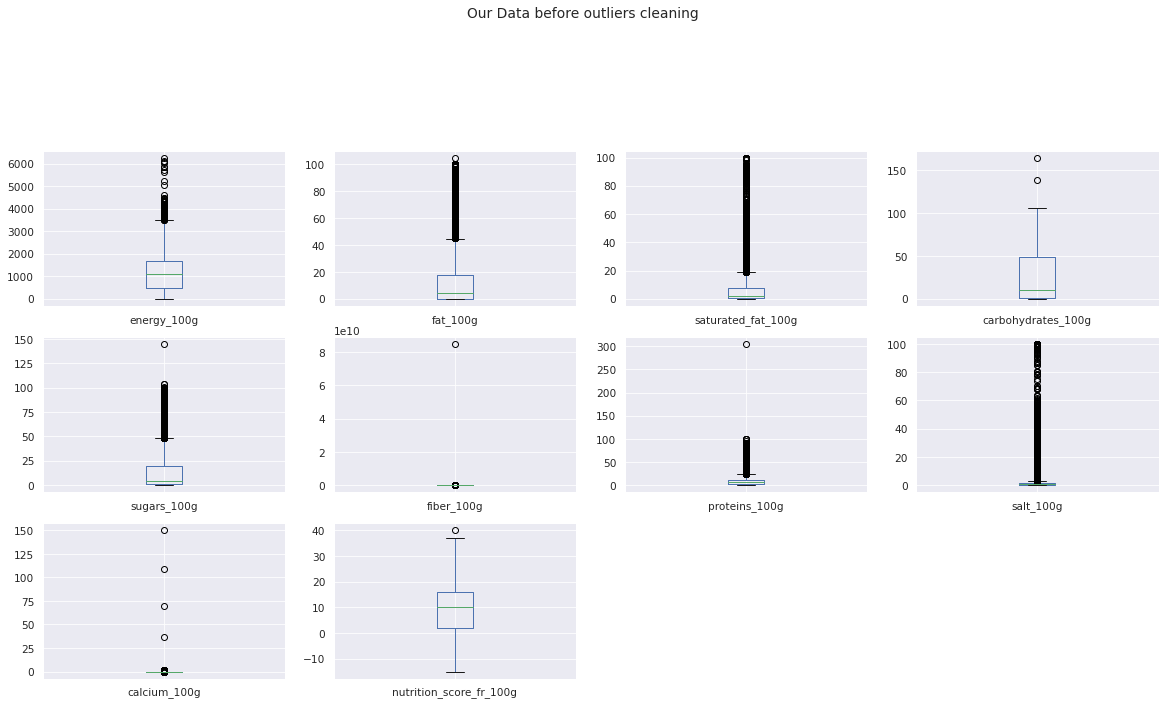

In [545]:
df.select_dtypes(include=float).plot(kind='box', subplots=True, title='Our Data before outliers cleaning', figsize=(20,20), layout=(6,4))
plt.show()

In [546]:
# We eliminate all values (outliers) that are more than 3 std's from the mean
df = df[np.abs(df['energy_100g']-df['energy_100g'].mean())<=(3*df['energy_100g'].std())]
df = df[np.abs(df['fat_100g']-df['fat_100g'].mean())<=(3*df['fat_100g'].std())]
df = df[np.abs(df['saturated_fat_100g']-df['saturated_fat_100g'].mean())<=(3*df['saturated_fat_100g'].std())]
df = df[np.abs(df['carbohydrates_100g']-df['carbohydrates_100g'].mean())<=(3*df['carbohydrates_100g'].std())]
df = df[np.abs(df['sugars_100g']-df['sugars_100g'].mean())<=(3*df['sugars_100g'].std())]
df = df[np.abs(df['fiber_100g']-df['fiber_100g'].mean())<=(3*df['fiber_100g'].std())]
df = df[np.abs(df['proteins_100g']-df['proteins_100g'].mean())<=(3*df['proteins_100g'].std())]
df = df[np.abs(df['salt_100g']-df['salt_100g'].mean())<=(3*df['salt_100g'].std())]
df = df[np.abs(df['calcium_100g']-df['calcium_100g'].mean())<=(3*df['calcium_100g'].std())]
df = df[np.abs(df['nutrition_score_fr_100g']-df['nutrition_score_fr_100g'].mean())<=(3*df['nutrition_score_fr_100g'].std())]

In [547]:
df.describe()

,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,calcium_100g,nutrition_score_fr_100g
count,81613.00,81613.00,81613.00,81613.00,81613.00,81613.00,81613.00,81613.00,81613.00,81613.00
mean,1079.32,9.93,4.78,23.53,12.86,1.86,7.83,0.89,0.01,8.91
std,705.48,12.26,6.12,26.48,16.94,6.03,7.21,1.22,0.06,8.90
min,0.00,0.00,0.00,0.00,-0.10,0.00,0.00,0.00,0.00,-15.00
25%,440.00,0.10,0.30,0.90,1.10,0.00,2.20,0.08,0.00,2.00
50%,1023.00,4.00,2.00,11.00,4.40,0.00,6.10,0.57,0.00,9.00
75%,1628.00,17.00,7.10,48.90,18.50,2.40,11.00,1.28,0.00,16.00
max,3489.00,57.20,25.91,100.00,73.20,990.00,33.30,13.60,1.53,35.00


We still have an incorrect value after removing outlier that was 3 times greater than the std's from the mean for the fiber_100g columns (it should not be greater than 100g). We also have one in sugar since we have a negative value for the minimum.

In [548]:
df = df[df['sugars_100g'] >= 0]
df = df[df['fiber_100g'] <= 100]
df.describe()

,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,calcium_100g,nutrition_score_fr_100g
count,81606.00,81606.00,81606.00,81606.00,81606.00,81606.00,81606.00,81606.00,81606.00,81606.00
mean,1079.35,9.93,4.78,23.53,12.86,1.83,7.83,0.89,0.01,8.91
std,705.47,12.26,6.11,26.48,16.94,4.02,7.21,1.22,0.06,8.90
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-15.00
25%,440.00,0.10,0.30,0.90,1.10,0.00,2.20,0.08,0.00,2.00
50%,1023.00,4.00,2.00,11.00,4.40,0.00,6.10,0.57,0.00,9.00
75%,1628.00,17.00,7.10,48.90,18.50,2.40,11.00,1.28,0.00,16.00
max,3489.00,57.20,25.91,100.00,73.20,100.00,33.30,13.60,1.53,35.00


In [549]:
print('There are {:,} rows and {} columns left in our dataset'.format(df.shape[0], df.shape[1]))
df.head()

There are 81,606 rows and 17 columns left in our dataset


,product_name,brands,categories_en,countries_en,allergens,nutrition_grade_fr,main_category,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,calcium_100g,nutrition_score_fr_100g
185,Root Beer,A&W,Beverages,France,"Warning, it can contains allergens",e,en:beverages,215.00,0.00,0.00,14.20,13.60,0.00,0.00,0.06,0.00,18.00
190,Thé noir aromatisé violette et fleurs,Alice Délice,Beverages,France,"Warning, it can contains allergens",c,en:beverages,17.00,0.10,0.10,0.10,0.10,0.00,0.10,0.00,0.00,2.00
193,Preparation mug cake chocolat-caramel au beurr...,Alice Délice,No category,France,"Warning, it can contains allergens",e,No main category,1632.00,7.00,4.50,70.00,42.00,0.00,7.00,0.97,0.00,21.00
195,Praliné Amande Et Noisette,Alice Délice,No category,France,"Warning, it can contains allergens",d,No main category,2406.00,0.00,2.90,0.00,50.30,3.90,9.50,0.00,0.00,14.00
231,"Pepsi, Nouveau goût !",Pepsi,Beverages,France,"Warning, it can contains allergens",e,en:beverages,177.00,0.00,0.00,10.40,10.40,0.00,0.00,0.03,0.00,13.00


In [554]:
df.isnull().sum()

product_name               0
brands                     0
categories_en              0
countries_en               0
allergens                  0
nutrition_grade_fr         0
main_category              0
energy_100g                0
fat_100g                   0
saturated_fat_100g         0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
calcium_100g               0
nutrition_score_fr_100g    0
dtype: int64

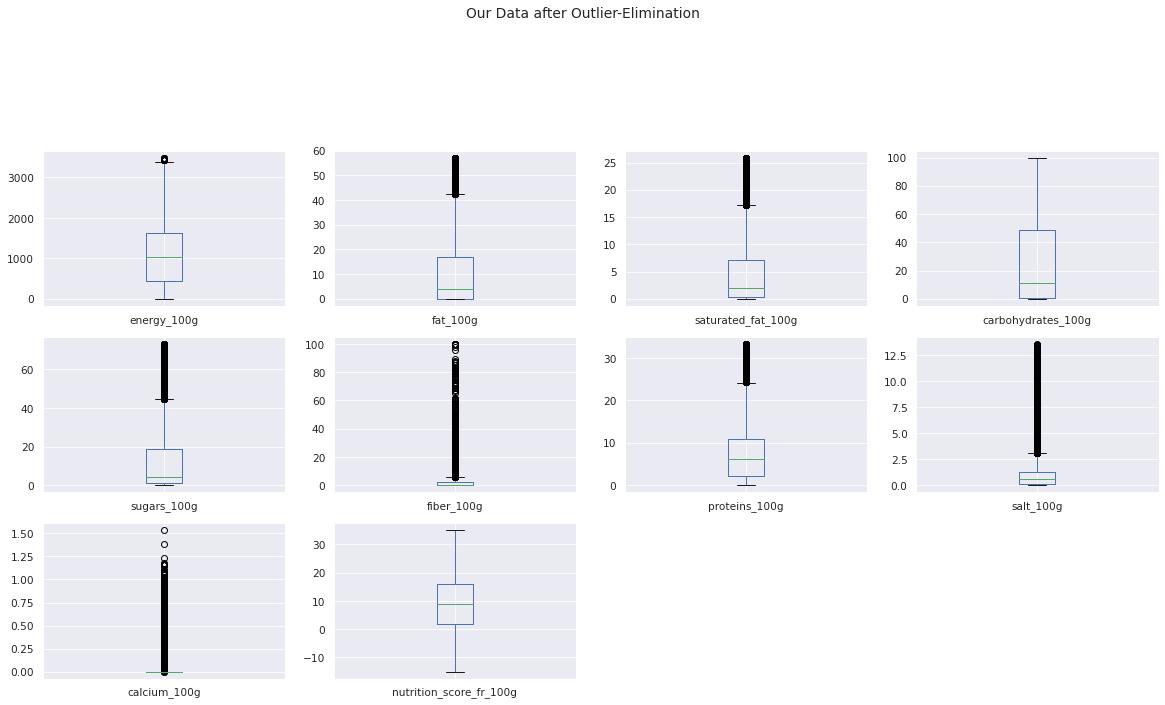

In [550]:
df.select_dtypes(include=float).plot(kind='box', subplots=True, title='Our Data after Outlier-Elimination', figsize=(20,20), layout=(6,4))
plt.show()

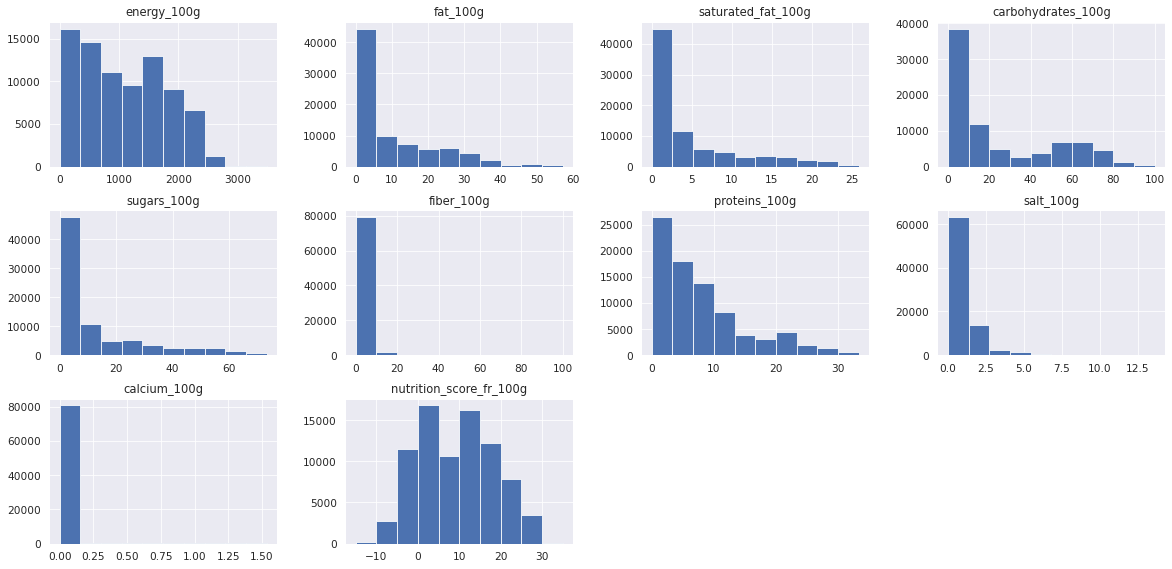

In [551]:
df.hist(figsize=(20,20), layout=(6,4))
plt.show()

There are hardly any normal distributions with the exeption of the nutrition score.

## Conclusion :


* Our Data is very messy and many entries are obviously flawed. We can easily clean up many of the imperfections however we don't know to which degree we can trust our cleaned data.

* With The exception of the nutrition_grade_fr, none of our variables follow a normal distribution.
* The Products in our data descend predominantly from the US, France.
* There is a very high correlation between the variables salt_100g and sodium_100g (one of the variables can be ommited in our analysis).
* The main drivers of energy_100g seem to be fat_100g and carbohydrates_100g.
* The variables that impact the health_score_100g (negatively) the most are sugars_100g, salt_100g and saturated_fat_100g. It should be noted, that carbohydrates seem to have a (slightly) positive impact on the nutrition-score while fat_100g has the opposite effect. Fiber_100g seems to hast the strongest positive effect on the health_score.

*Our data is clean, we could generate a new csv and work with it for our machine learning model and train it.*